In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Thông tin dataset

In [65]:
df = pd.read_csv('data.csv')
df.head()

,Ngày,Giá điều chỉnh,Giá đóng cửa,Thay đổi,Khối lượng khớp lệnh,Giá trị khớp lệnh,KL thoả thuận,GT thoả thuận,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,14/12/2023,32.0,32.0,0(0.00 %),15658600,504492000000,0,0,32.5,32.50,31.9
1,13/12/2023,32.0,32.0,-0.6(-1.84 %),21549400,700751000000,982000,32013200000,32.9,32.95,32.0
2,12/12/2023,32.6,32.6,-0.1(-0.31 %),12453800,406841000000,1500001,48975030450,32.8,33.00,32.5
3,11/12/2023,32.7,32.7,0.1(0.31 %),19996900,649302000000,25001,815030350,32.6,33.05,32.1
4,08/12/2023,32.6,32.6,-0.25(-0.76 %),18079900,591368000000,1,30600,32.7,33.00,32.3


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ngày                  1737 non-null   object 
 1   Giá điều chỉnh        1737 non-null   float64
 2   Giá đóng cửa          1737 non-null   float64
 3   Thay đổi              1737 non-null   object 
 4   Khối lượng khớp lệnh  1737 non-null   int64  
 5   Giá trị khớp lệnh     1737 non-null   int64  
 6   KL thoả thuận         1737 non-null   int64  
 7   GT thoả thuận         1737 non-null   int64  
 8   Giá mở cửa            1737 non-null   float64
 9   Giá cao nhất          1737 non-null   float64
 10  Giá thấp nhất         1737 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 149.4+ KB


## 2. Mối quan hệ giữa các trường dữ liệu

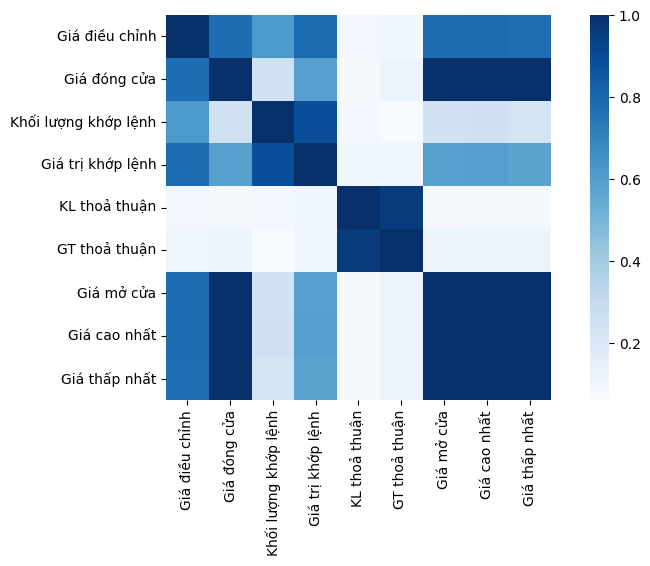

In [67]:
# Assuming 'Ngày' is the date column, you might want to exclude it from the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr(method="pearson")

# Create a subplot with a specified figure size
f, ax = plt.subplots(figsize=(10, 5))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap="Blues", square=True, ax=ax)

# Show the plot
plt.show()

Nhận xét

- Từ đồ thị có thể thấy thuộc tính Giá mở cửa và Giá đóng cửa có mối tương quan thuận với nhau.
- Sau khi sử dụng heatmap để hình dung sơ bộ sự tương quan của Giá mở cửa và Giá đóng cửa, dưới đây là thể hiện rõ ràng sự tương quan của 2 thuộc tính

## 3. Mối tương quan giữa Open price và Close price

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

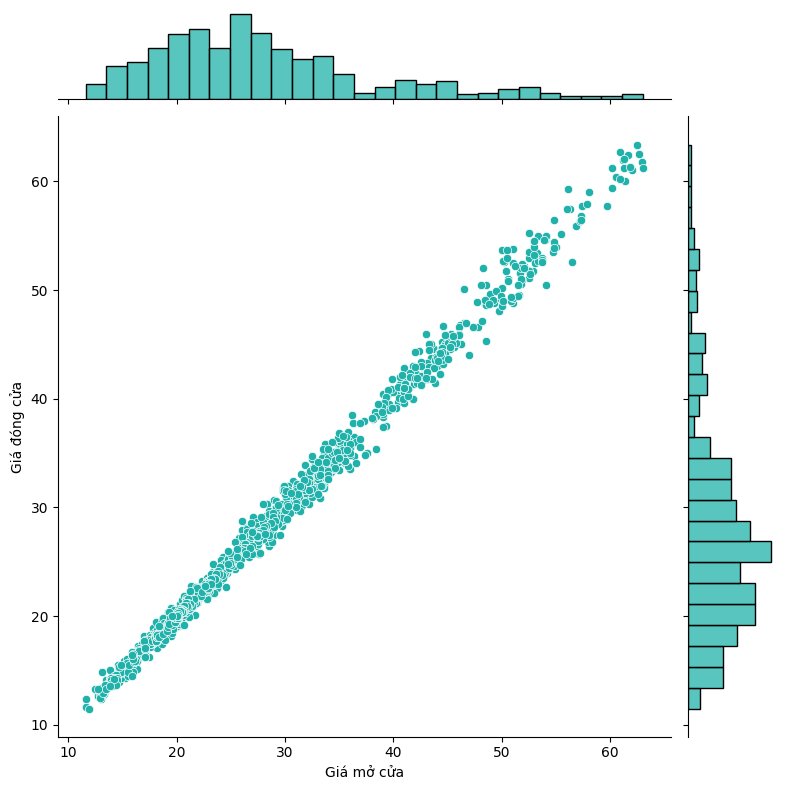

In [68]:
sns.jointplot(x = "Giá mở cửa", y = "Giá đóng cửa", data = df, height = 8, ratio = 6, kind = "scatter", color='lightseagreen')

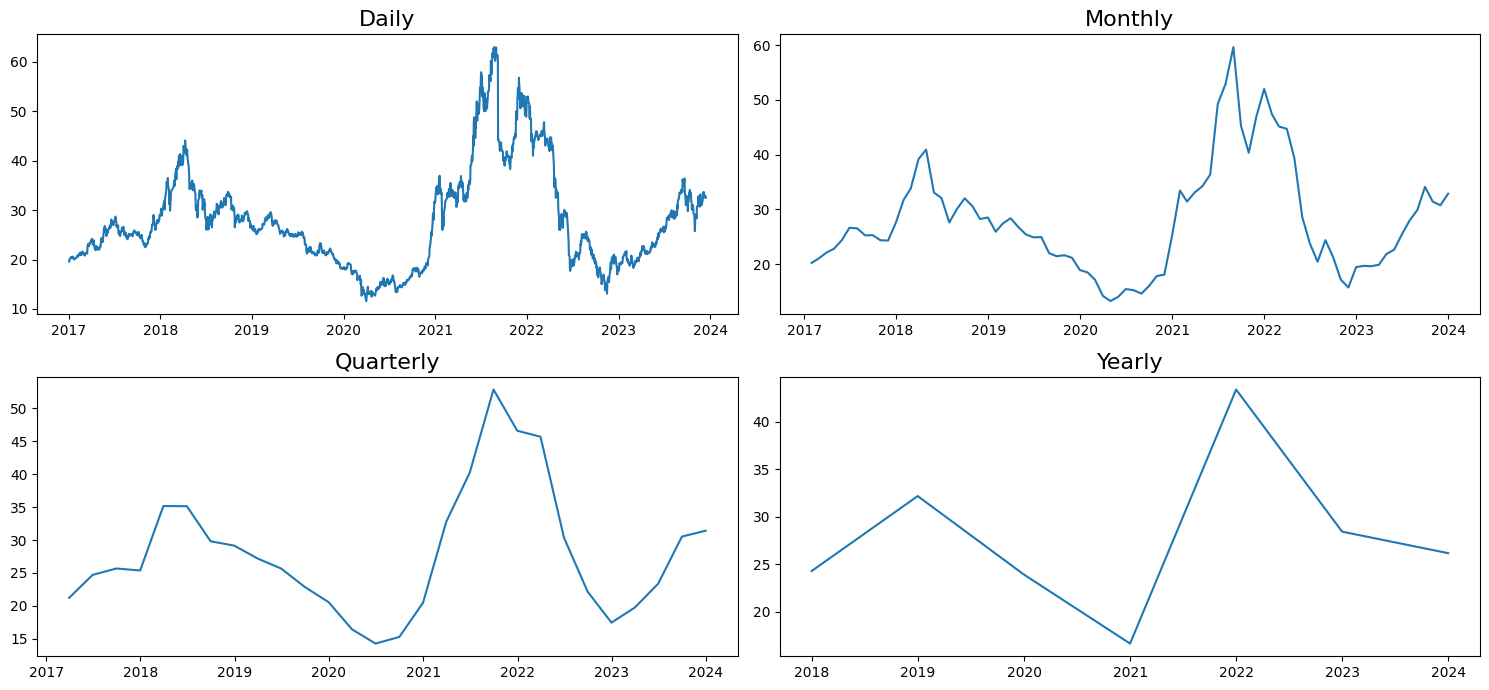

In [69]:
data=df.copy()

# Convert 'Ngày' column to datetime format
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')

# Set 'Ngày' column as the index
data.set_index('Ngày', inplace=True)

# Filter data for the targeted period
# data = data[data.index >= '2019-01-01']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=[15, 7])

# Resampling to daily frequency (original data)
axes[0, 0].plot(data['Giá mở cửa'])
axes[0, 0].set_title("Daily", size=16)

# Resampling to monthly frequency
axes[0, 1].plot(data['Giá mở cửa'].resample('M').mean())
axes[0, 1].set_title("Monthly", size=16)

# Resampling to quarterly frequency
axes[1, 0].plot(data['Giá mở cửa'].resample('Q').mean())
axes[1, 0].set_title('Quarterly', size=16)

# Resampling to yearly frequency
axes[1, 1].plot(data['Giá mở cửa'].resample('A').mean())
axes[1, 1].set_title('Yearly', size=16)

plt.tight_layout()
plt.show()

Nhật xét

- Giai đoạn trước năm 2020, Giá mở cửa có dấu hiệu sụt giảm tới năm 2021 là chạm đáy.
- Sau đó thì Giá mở cửa bắt đầu tăng trưởng ổn định trở lại
- Các kỹ thuật được áp dụng: Facet (Thể hiện biểu đồ qua từng ngày, từng tháng, từng quý, từng năm). Khi ta áp dụng kỹ thuật này sẽ cho ta dễ thấy được sự biến động cụ thể Giá mở cửa của vàng qua từng khung thời gian mà ta thể hiện.
- Từ việc trực quan hóa, biểu đồ trên giúp ta thấy được Giá mở cửa đang phục hồi khá nhiều sau Covid-19 từ đó giúp ích cho việc đầu tư.

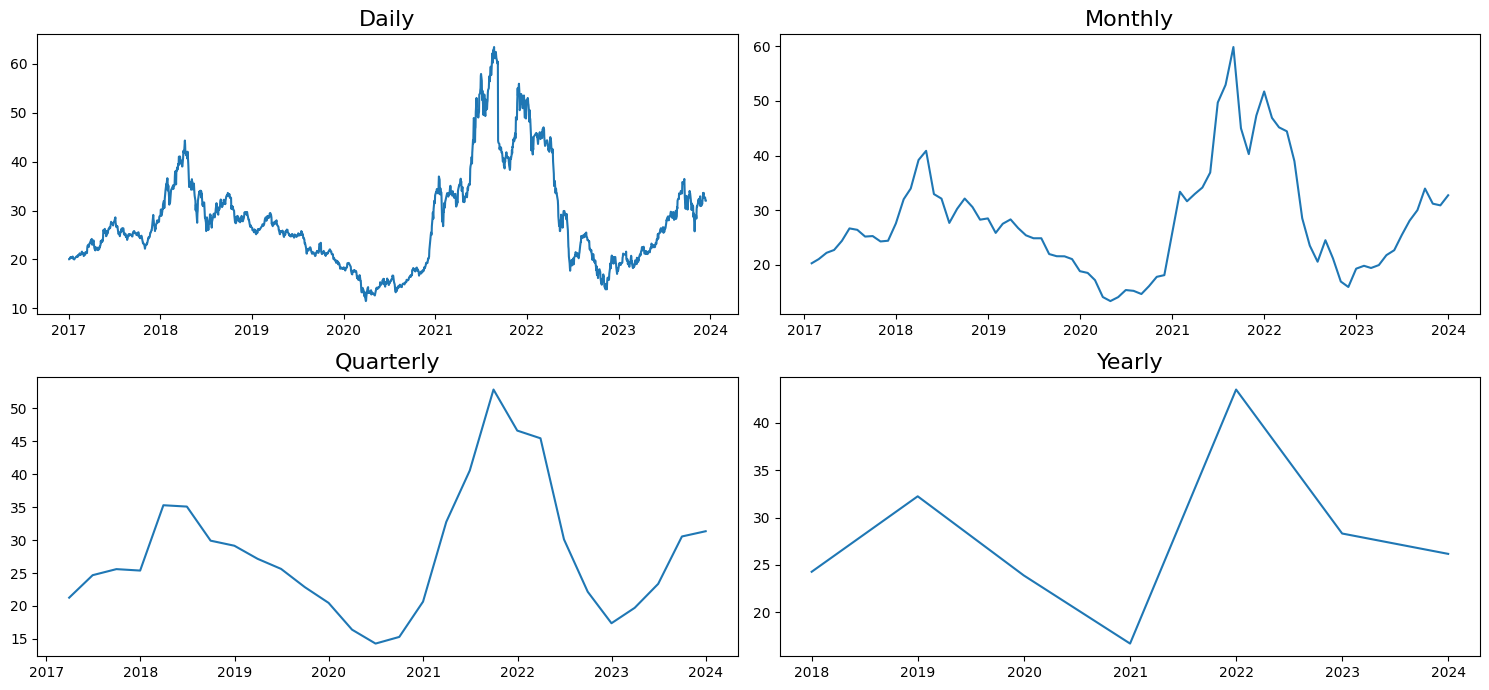

In [70]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=[15, 7])

# Resampling to daily frequency (original data)
axes[0, 0].plot(data['Giá đóng cửa'])
axes[0, 0].set_title("Daily", size=16)

# Resampling to monthly frequency
axes[0, 1].plot(data['Giá đóng cửa'].resample('M').mean())
axes[0, 1].set_title("Monthly", size=16)

# Resampling to quarterly frequency
axes[1, 0].plot(data['Giá đóng cửa'].resample('Q').mean())
axes[1, 0].set_title('Quarterly', size=16)

# Resampling to yearly frequency
axes[1, 1].plot(data['Giá đóng cửa'].resample('A').mean())
axes[1, 1].set_title('Yearly', size=16)

plt.tight_layout()
plt.show()

Nhận xét

- Giai đoạn trước năm 2020, Giá đóng cửa có dấu hiệu sụt giảm tới năm 2021 là chạm đáy.
- Sau đó thì Giá đóng cửa bắt đầu tăng trưởng ổn định trở lại
- Các kỹ thuật được áp dụng: Facet (Thể hiện biểu đồ qua từng ngày, từng tháng, từng quý, từng năm). Khi ta áp dụng kỹ thuật này sẽ cho ta dễ thấy được sự biến động cụ thể Giá đóng cửa của vàng qua từng khung thời gian mà ta thể hiện.
- Từ việc trực quan hóa, biểu đồ trên giúp ta thấy được Giá đóng cửa đang phục hồi khá nhiều sau Covid-19 từ đó giúp ích cho việc đầu tư.
- Có thể thấy sự giống nhau của Open price và Giá đóng cửa bởi vì chúng tương quan thuận dựa vào biểu đồ heat map ở trên

## 4. Sự thay đổi của Highest Price trước và sau Covid-19

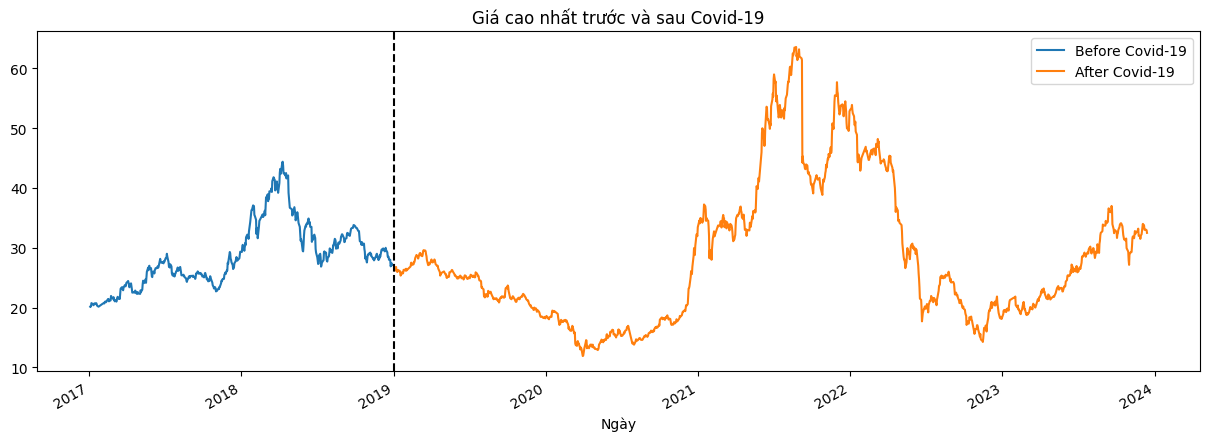

In [71]:
# Split data into before and after Covid periods
before_Covid = data[data.index < '2019-01-01']
after_Covid = data[data.index >= '2019-01-01']

# Plot highest prices before and after Covid-19
fig, ax = plt.subplots(figsize=(15, 5))

before_Covid["Giá cao nhất"].plot(ax=ax, label="Before Covid-19", title="Giá cao nhất trước và sau Covid-19")
after_Covid["Giá cao nhất"].plot(ax=ax, label="After Covid-19")

ax.axvline('2019-01-01', color='black', ls='--')
ax.legend(['Before Covid-19', 'After Covid-19'])
plt.show()

Nhận Xét:

- Ta sử dụng 2 màu để phân biệt giữa 2 giai đoạn trước và sau Covid-19.
- Giá cao nhất giảm trong giai đoạn dịch và bắt đầu phục hồi sau dịch.
- Các kỹ thuật được áp dụng: Manipulate View (Thay đổi màu sắc, định dạng biểu đồ, thay đổi tiêu đề, chú thích ). Ta chia 2 giai đoạn thành 2 màu khác nhau và ngăn cách bởi 1 mốc thời gian giúp ta so sánh rõ hơn sự thay đổi của 2 giai đoạn.
- Từ biểu đồ, ta có thể thấy được sự thay đổi giữa 2 giai đoạn giúp ích nhiều cho việc đầu tư.